# CALIPSO Ozone Number Density

### Summary

The goal of this notebook is to show how to plot vertical distribution of ozone number density ($m^{-3}$) using the `pyhdf` library for a latitudinal section. The data are from the CALIPSO Lidar Level 1B profile data, V4-51.

### Prerequisites

A free(!) account at https://www.earthdata.nasa.gov/ is needed to login and download the appropriate files.

This notebook was written using Python 3.8.10, and requires these libraries:

- [earthaccess](https://earthaccess.readthedocs.io/en/latest/)
- [matplotlib](http://matplotlib.org/)
- [numpy](https://numpy.org/)
- [pyhdf](https://github.com/fhs/pyhdf)

### Notebook Author / Affiliation
Cheyenne Land / Atmospheric Science Data Center

## 1. Setup

In [1]:
import earthaccess
import numpy as np
from matplotlib import pyplot as plt
from pyhdf.SD import SD, SDC

## 2. Search for data using earthaccess

We use `earthaccess` to streamline the login to NASA Earthdata. 

<details open>
  <summary><i>Additional resources about earthaccess</i></summary>

- [*earthaccess* documentation](https://earthaccess.readthedocs.io/en/latest/)
- [Earthdata Cloud Cookbook](https://nasa-openscapes.github.io/earthdata-cloud-cookbook/tutorials/earthaccess-demo.html)
</details>

In [2]:
earthaccess.login()

In [3]:
short_name = "CAL_LID_L1-Standard-V4-51"
version = "V4-51"

results = earthaccess.search_data(
    short_name=short_name, version=version, temporal=("2020-02-01T00:00:00", "2020-02-01T01:59:59")
)
print(f"{len(results[:])} file(s) found.")

3 file(s) found.


In [4]:
print(results)

[Collection: {'ShortName': 'CAL_LID_L1-Standard-V4-51', 'Version': 'V4-51'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'Lines': [{'Points': [{'Latitude': 77.436340332, 'Longitude': 171.039031982}, {'Latitude': 78.455823444, 'Longitude': 166.593692496}, {'Latitude': 79.336905179, 'Longitude': 161.706260626}, {'Latitude': 80.713705914, 'Longitude': 150.453975049}, {'Latitude': 81.592728206, 'Longitude': 137.033875562}, {'Latitude': 81.932023286, 'Longitude': 122.000871143}, {'Latitude': 81.697649597, 'Longitude': 106.710576372}, {'Latitude': 80.907042948, 'Longitude': 92.826795648}, {'Latitude': 79.607779782, 'Longitude': 81.123792826}, {'Latitude': 78.766029263, 'Longitude': 76.04493013}, {'Latitude': 76.551638952, 'Longitude': 66.481551943}, {'Latitude': 75.115071453, 'Longitude': 62.047476577}, {'Latitude': 73.470198105, 'Longitude': 58.098948508}, {'Latitude': 71.581951507, 'Longitude': 54.5517683}, {'Latitude': 69.436221619, 'Longitude': 51.381833235}, {'Latitude': 

## 3. Download data

Note: The following download process will likely take a while, because each file is greater than 400 MB.

In [5]:
downloaded_files = earthaccess.download(
    results,
    local_path=".",
)

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]

## 4. Generate Plot

Ozone_number_density [# of single shot (333m) resn profiles in file (55725), met_data_altitude (33)]

Plot has been saved: CAL_LID_L1-Standard-V4-51.2020-01-31T23-51-19ZN.hdf_Ozone_Number_Density.jpg
Plot has been saved: CAL_LID_L1-Standard-V4-51.2020-02-01T00-37-30ZD.hdf_Ozone_Number_Density.jpg
Plot has been saved: CAL_LID_L1-Standard-V4-51.2020-02-01T01-29-55ZN.hdf_Ozone_Number_Density.jpg


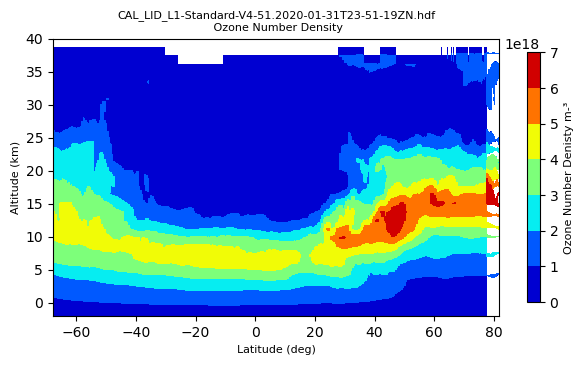

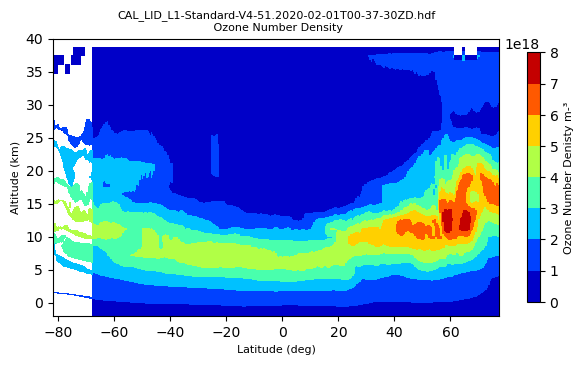

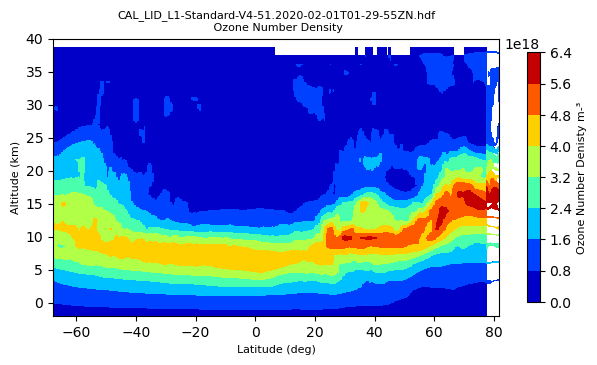

In [6]:
# Open and read file
for file in downloaded_files:
    hdf = SD(file, SDC.READ)
    ds = hdf.datasets()

    # Retrieve data
    hdfdataobject = hdf.select("Ozone_Number_Density")
    latitude = hdf.select("Latitude")
    data = hdfdataobject.get()
    ozone_number_density = np.transpose(data)
    lat = latitude.get()[:, 0]

    # Interval for altitude to plot the y-axis.
    # Range is from -2 km - 40 km of 33 range bins. For more detail go to CALIPSO Data Products Catalog at:
    #   https://www-calipso.larc.nasa.gov/products/CALIPSO_DPC_Rev4x93.pdf
    met_data_altitudes = np.linspace(-2, 40, 33)

    # Plot data
    plt.figure(figsize=(7.20, 3.60))
    im = plt.contourf(lat, met_data_altitudes, ozone_number_density, cmap="jet")

    plt.title(f"{file}\n Ozone Number Density", fontsize=8)
    plt.ylabel("Altitude (km)", fontsize=8)
    plt.xlabel("Latitude (deg)", fontsize=8)
    cb = plt.colorbar(im, shrink=0.90)
    cb.set_label("Ozone Number Denisty m-³", fontsize=8)

    plt.savefig(f"{file}_Ozone_Number_Density.jpg", dpi=200)
    print(f"Plot has been saved: {file}_Ozone_Number_Density.jpg")